### Box plots - CSCI 5502

In [27]:
library(tidyr)
library(dplyr)
library(varhandle)

In [31]:
us_visa<- read.csv('us_perm_visas.csv', header=TRUE)

In [32]:
#merge attributes
us_visa$case_no<- paste(us_visa$case_no, us_visa$case_number)
mydata<- select(us_visa, -case_number)

mydata$country_of_citizenship<- paste(mydata$country_of_citizenship, mydata$country_of_citzenship)
US_visa<- select(mydata, -country_of_citzenship)

In [33]:
wage<- US_visa$wage_offer_from_9089
table(US_visa$wage_offer_unit_of_pay_9089)
#separate into groups: hour, week, biweekly, month, year
#the wage per hour
sub_Hour<- subset(US_visa, wage_offer_unit_of_pay_9089 == "Hour")
sub_Hr<- subset(US_visa, wage_offer_unit_of_pay_9089 == "hr")
sub_hr<- rbind(sub_Hr, sub_Hour)
#the wage per week
sub_Week<- subset(US_visa, wage_offer_unit_of_pay_9089 == "Week")
sub_Wk<- subset(US_visa, wage_offer_unit_of_pay_9089 == "wk")
sub_wk<- rbind(sub_Week, sub_Wk)
#the wage biweekly
sub_Bi<- subset(US_visa, wage_offer_unit_of_pay_9089 == "bi")
sub_Bi_weekly<- subset(US_visa, wage_offer_unit_of_pay_9089 == "Bi-Weekly")
sub_bi<- rbind(sub_Bi, sub_Bi_weekly)
#the wage per month
sub_Month<- subset(US_visa, wage_offer_unit_of_pay_9089 == "Month")
sub_month<- subset(US_visa, wage_offer_unit_of_pay_9089 == "mth")
sub_mth<- rbind(sub_Month, sub_month)
#the wage per year
sub_Year<- subset(US_visa, wage_offer_unit_of_pay_9089 == "Year")
sub_year<- subset(US_visa, wage_offer_unit_of_pay_9089 == "yr")
sub_yr<- rbind(sub_Year, sub_year)


                 bi Bi-Weekly      Hour        hr     Month       mth      Week 
   115516         9         3      1215       781        14        21        23 
       wk      Year        yr 
       30     68188     19733 

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

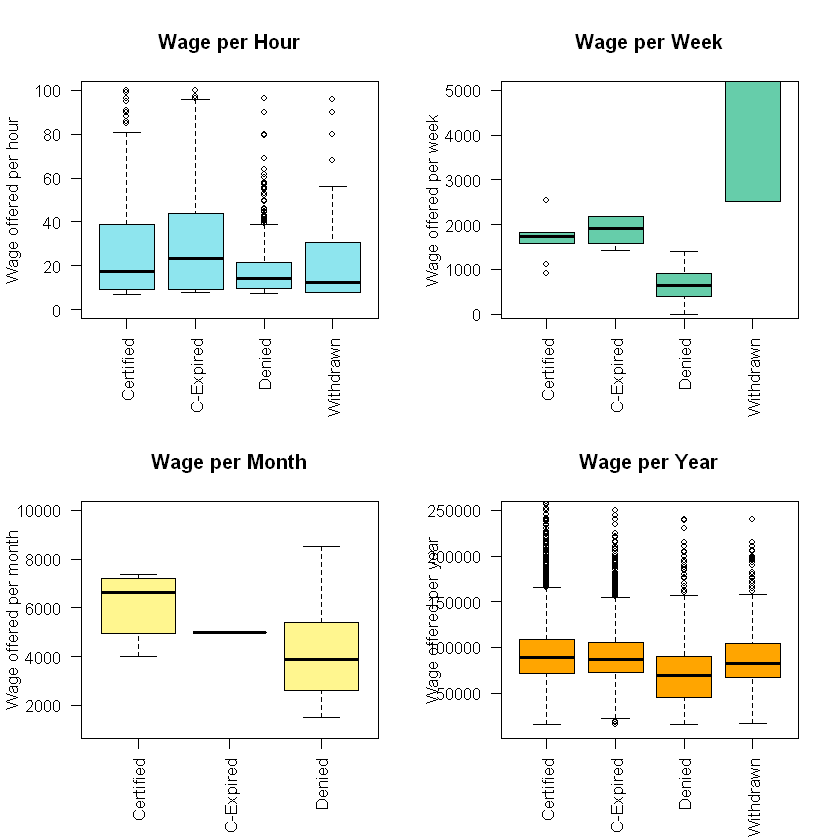

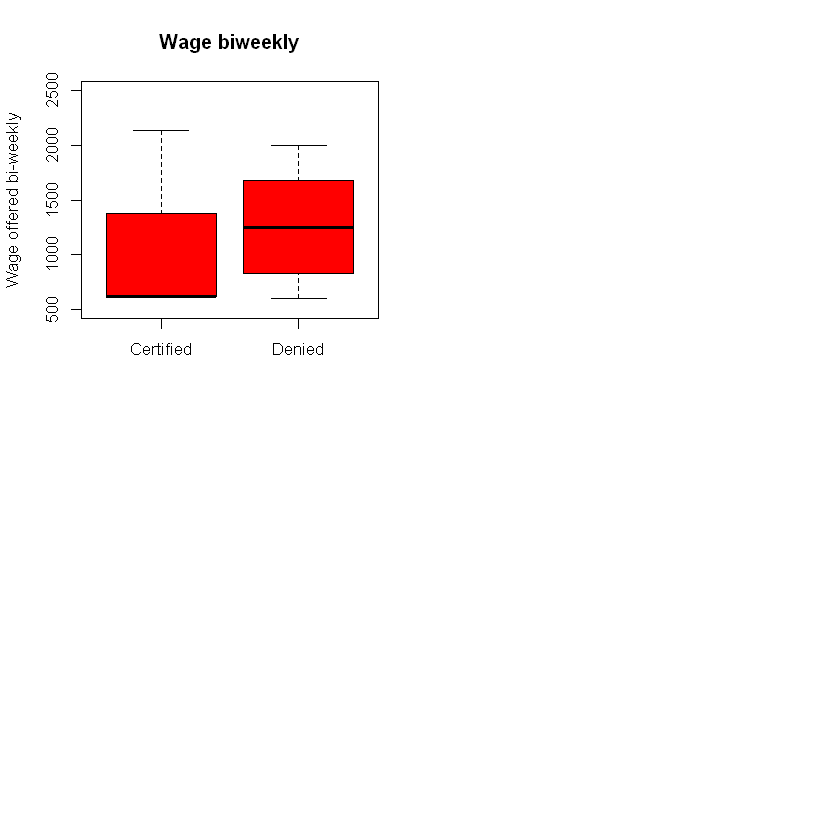

In [35]:
case_status<- sub_hr$case_status
#table(case_status)
sub_hr$dummy[sub_hr$case_status=="Certified"]<- "1"
sub_hr$dummy[sub_hr$case_status=="Certified-Expired"]<- "2"
sub_hr$dummy[sub_hr$case_status=="Denied"]<- "3"
sub_hr$dummy[sub_hr$case_status=="Withdrawn"]<- "4"
sub_hr$dummy<- factor(sub_hr$dummy)

sub_wk$dummy[sub_wk$case_status=="Certified"]<- "1"
sub_wk$dummy[sub_wk$case_status=="Certified-Expired"]<- "2"
sub_wk$dummy[sub_wk$case_status=="Denied"]<- "3"
sub_wk$dummy[sub_wk$case_status=="Withdrawn"]<- "4"
sub_wk$dummy<- factor(sub_wk$dummy)

sub_bi$dummy[sub_bi$case_status=="Certified"]<- "1"
sub_bi$dummy[sub_bi$case_status=="Denied"]<- "3"
sub_bi$dummy<- factor(sub_bi$dummy)

sub_mth$dummy[sub_mth$case_status=="Certified"]<- "1"
sub_mth$dummy[sub_mth$case_status=="Certified-Expired"]<- "2"
sub_mth$dummy[sub_mth$case_status=="Denied"]<- "3"
sub_mth$dummy<- factor(sub_mth$dummy)

sub_yr$dummy[sub_yr$case_status=="Certified"]<- "1"
sub_yr$dummy[sub_yr$case_status=="Certified-Expired"]<- "2"
sub_yr$dummy[sub_yr$case_status=="Denied"]<- "3"
sub_yr$dummy[sub_yr$case_status=="Withdrawn"]<- "4"
sub_yr$dummy<- factor(sub_yr$dummy)

wage_offer_hour<- as.numeric(paste(sub_hr$wage_offer_from_9089))
wage_offer_week<- as.numeric(paste(sub_wk$wage_offer_from_9089))
wage_offer_biweek<- as.numeric(paste(sub_bi$wage_offer_from_9089))
wage_offer_month<- as.numeric(paste(sub_mth$wage_offer_from_9089))
wage_offer_year<- as.numeric(paste(sub_yr$wage_offer_from_9089))


par(mfrow=c(2,2))
boxplot(wage_offer_hour ~ sub_hr$dummy, las=2, ylim=c(0,100),
       names = c("Certified","C-Expired","Denied","Withdrawn"),
       ylab="Wage offered per hour", col="cadetblue2", main="Wage per Hour")
boxplot(wage_offer_week ~ sub_wk$dummy, las=2, ylim=c(100,5000),
       names = c("Certified","C-Expired","Denied","Withdrawn"),
       ylab="Wage offered per week", col="aquamarine3", main="Wage per Week")
boxplot(wage_offer_month ~ sub_mth$dummy, las=2, ylim=c(1000,10000),
       names = c("Certified","C-Expired","Denied"),
       ylab="Wage offered per month", col="khaki1", main="Wage per Month")
boxplot(wage_offer_year ~ sub_yr$dummy, las=2, ylim=c(10000, 250000),
       names = c("Certified","C-Expired","Denied","Withdrawn"),
       ylab="Wage offered per year", col="orange", main="Wage per Year")
boxplot(wage_offer_biweek ~ sub_bi$dummy, ylim=c(500,2500),
       names = c("Certified","Denied"), col="red",
       ylab="Wage offered bi-weekly", main="Wage biweekly")

**Let each group be consistent: "Wage per month x 12", "Wage biweekly x 26", "Wage per week x 52", "Wage per hour x 40 x 52"**

In [7]:
perm_2012<- read.csv('PERM_2012.csv', header=TRUE)
perm_2013<- read.csv('PERM_2013.csv', header=TRUE)
perm_2014<- read.csv('PERM_2014.csv', header=TRUE)
perm_2015<- read.csv('PERM_2015.csv', header=TRUE)
perm_2016<- read.csv('PERM_2016.csv', header=TRUE)

In [8]:
perm_2017<- read.csv('PERM_2017.csv', header=TRUE)
perm_2018<- read.csv('PERM_2018.csv', header=TRUE)

In [8]:
table(perm_2012$WAGE_OFFER_UNIT_OF_PAY_9089)
table(perm_2012$CASE_STATUS)

table(perm_2013$PW_Unit_of_Pay_9089)
table(perm_2013$CASE_STATUS)
table(perm_2013$Class_of_Admission)

table(perm_2013$PW_Unit_of_Pay_9089)
table(perm_2013$CASE_STATUS)


         bi    hr   mth    wk    yr 
 3045    12  1893    61    63 61414 


        Certified Certified-Expired            Denied         Withdrawn 
                2             54579              8642              3265 


       Hour Month  Week  Year 
    1   385    12    16 19372 


        Certified Certified-Expired 
             3051             16735 


                  A-3      A1/A2        B-1        B-2        C-1        E-1 
       997          2          5         25        153          5         32 
       E-2        E-3        EWI        F-1        F-2        G-4        G-5 
       149         33        174        482         38          5          6 
      H-1A       H-1B      H-1B1       H-2A       H-2B        H-3        H-4 
         4      16095         40          3         10          1         42 
       H1B          I        J-1        J-2        L-1        L-2          N 
         1          4         33          2        729         18          1 
Not in USA        O-1        O-2        O-3        P-1    Parolee        R-1 
       116         31          2          1          7        376          1 
       T-1         TN        TPS        VWB        VWT 
         1        149          9          1          3 


       Hour Month  Week  Year 
    1   385    12    16 19372 


        Certified Certified-Expired 
             3051             16735 

In [74]:
#consider the year of 2017
#perm_2017<- perm_2017[!(is.na(perm_2017$WAGE_OFFER_FROM_9089) | perm_2017$WAGE_OFFER_FROM_9089==""), ]
unit_2017<- perm_2017$WAGE_OFFER_UNIT_OF_PAY_9089
table(unit_2017)
table(perm_2017$CASE_STATUS)

perm_2017$WAGE_OFFER_FROM_9089<- gsub("[,]","",perm_2017$WAGE_OFFER_FROM_9089)
perm_2017$WAGE_OFFER_FROM_9089<- as.numeric(as.character(perm_2017$WAGE_OFFER_FROM_9089))
perm_2017[1:5,34]

wage_2017<- perm_2017$WAGE_OFFER_FROM_9089

perm_2017$dummy[perm_2017$CASE_STATUS=="Certified"]<- "1"
perm_2017$dummy[perm_2017$CASE_STATUS=="Certified-Expired"]<- "2"
perm_2017$dummy[perm_2017$CASE_STATUS=="Denied"]<- "3"
perm_2017$dummy[perm_2017$CASE_STATUS=="Withdrawn"]<- "4"
perm_2017$dummy<- factor(perm_2017$dummy)

perm_2017$yearly_wage[unit_2017=="Month"]<- wage_2017*12
perm_2017$yearly_wage[unit_2017=="Bi-Weekly"]<- wage_2017*26
perm_2017$yearly_wage[unit_2017=="Week"]<- wage_2017*52
perm_2017$yearly_wage[unit_2017=="Hour"]<- wage_2017*40*52
perm_2017$yearly_wage[unit_2017=="Year"]<- wage_2017
perm_2017$yearly_wage[unit_2017==""]<- wage_2017
perm_2017$yearly_wage<- as.numeric(perm_2017$yearly_wage)

write.csv(perm_2017,'perm_2017_new.csv')

unit_2017
          Bi-Weekly      Hour     Month      Week      Year 
       19         9      3470        36        68     94001 


        Certified Certified-Expired            Denied         Withdrawn 
            42080             45529              6413              3581 

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

[1] 119683  89200  18803  85910  75000

Warning message in perm_2017$yearly_wage[unit_2017 == "Month"] <- wage_2017 * 12:
"number of items to replace is not a multiple of replacement length"Warning message in perm_2017$yearly_wage[unit_2017 == "Bi-Weekly"] <- wage_2017 * :
"number of items to replace is not a multiple of replacement length"Warning message in perm_2017$yearly_wage[unit_2017 == "Week"] <- wage_2017 * 52:
"number of items to replace is not a multiple of replacement length"Warning message in perm_2017$yearly_wage[unit_2017 == "Hour"] <- wage_2017 * 40 * :
"number of items to replace is not a multiple of replacement length"Warning message in perm_2017$yearly_wage[unit_2017 == "Year"] <- wage_2017:
"number of items to replace is not a multiple of replacement length"Warning message in perm_2017$yearly_wage[unit_2017 == ""] <- wage_2017:
"number of items to replace is not a multiple of replacement length"

From the boxplot above, we can conclude that the wage may not affect the approval rate of H1B visa.

In [14]:
perm_2017<- read.csv('perm_2017_new.csv', header=TRUE)

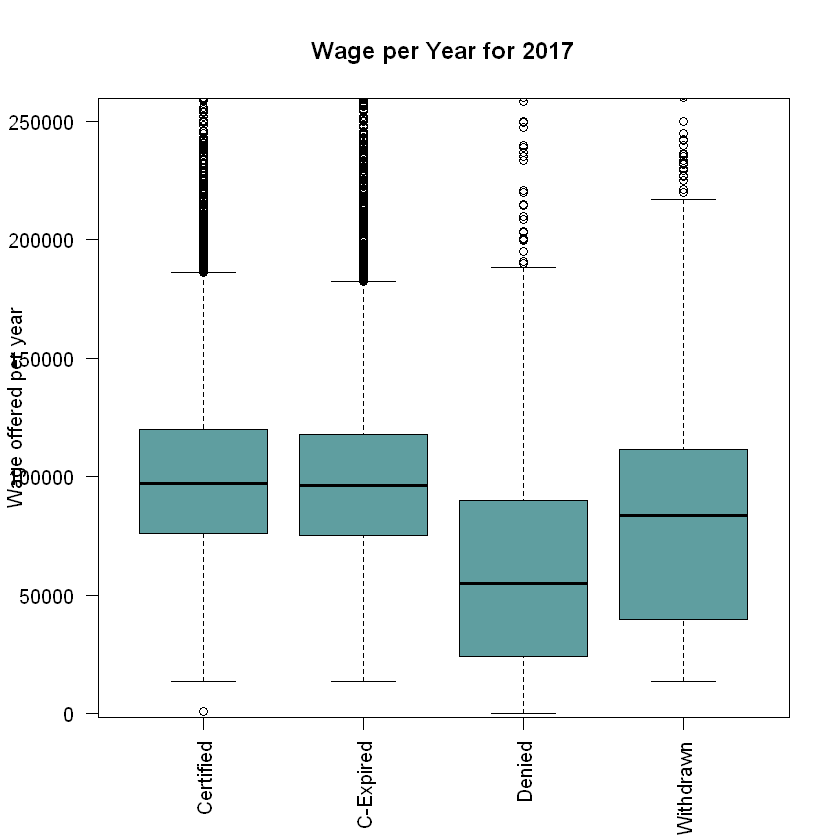

In [15]:
boxplot(perm_2017$all.year ~ perm_2017$dummy, las=2, ylim=c(8000, 250000),
       names = c("Certified","C-Expired","Denied","Withdrawn"),
       ylab="Wage offered per year", col="cadetblue", main="Wage per Year for 2017")

In [21]:
perm_2015<- read.csv('perm_2015(new).csv', header=TRUE)
table(perm_2015$CASE_STATUS)


        Certified Certified-Expired            Denied         Withdrawn 
            41223             37715              5999              4362 

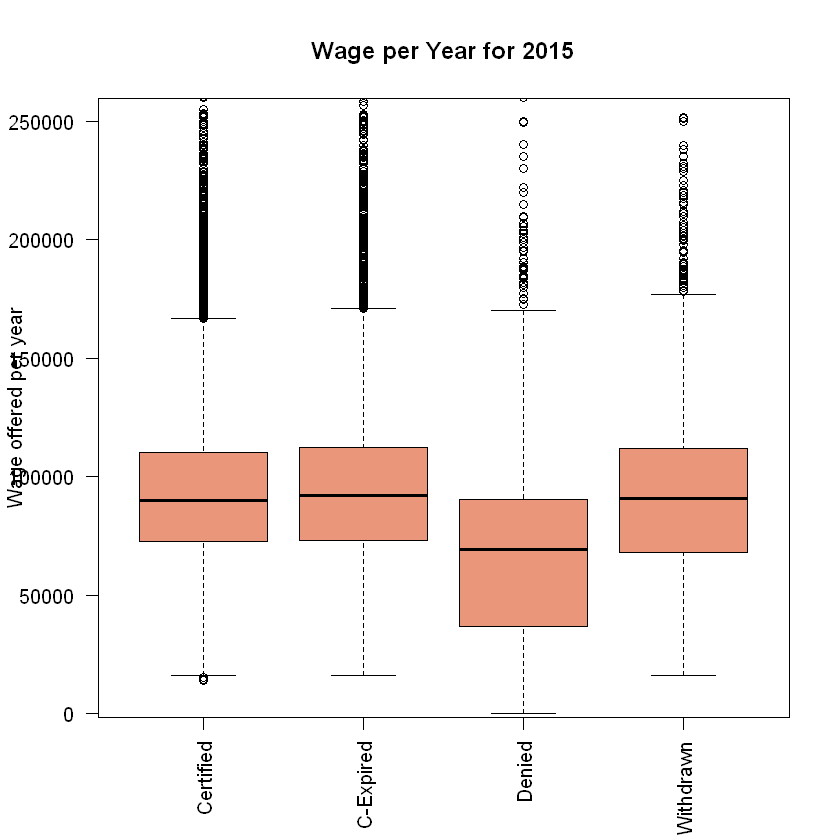

In [23]:
perm_2015$dummy[perm_2015$CASE_STATUS=="Certified"]<- "1"
perm_2015$dummy[perm_2015$CASE_STATUS=="Certified-Expired"]<- "2"
perm_2015$dummy[perm_2015$CASE_STATUS=="Denied"]<- "3"
perm_2015$dummy[perm_2015$CASE_STATUS=="Withdrawn"]<- "4"
perm_2015$dummy<- factor(perm_2015$dummy)

boxplot(perm_2015$all.year ~ perm_2015$dummy, las=2, ylim=c(8000, 250000),
       names = c("Certified","C-Expired","Denied","Withdrawn"),
       ylab="Wage offered per year", col="darksalmon", main="Wage per Year for 2015")

In [11]:
perm_2016<- read.csv('perm_2016(new).csv', header=TRUE)
table(perm_2016$CASE_STATUS)


        Certified Certified-Expired            Denied         Withdrawn 
            58750             57183              5560              4650 

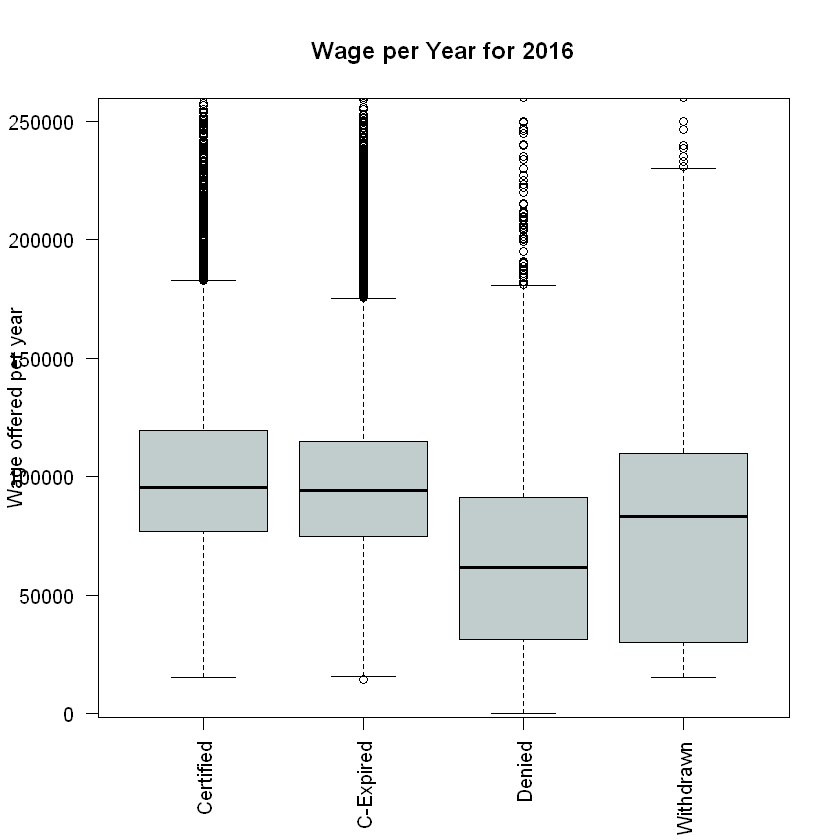

In [16]:
perm_2016$dummy[perm_2016$CASE_STATUS=="Certified"]<- "1"
perm_2016$dummy[perm_2016$CASE_STATUS=="Certified-Expired"]<- "2"
perm_2016$dummy[perm_2016$CASE_STATUS=="Denied"]<- "3"
perm_2016$dummy[perm_2016$CASE_STATUS=="Withdrawn"]<- "4"
perm_2016$dummy<- factor(perm_2016$dummy)

boxplot(perm_2016$all.year ~ perm_2016$dummy, las=2, ylim=c(8000, 250000),
       names = c("Certified","C-Expired","Denied","Withdrawn"),
       ylab="Wage offered per year", col="azure3", main="Wage per Year for 2016")

In [17]:
perm_2018<- read.csv('perm_2018(new).csv', header=TRUE)
table(perm_2018$CASE_STATUS)


        Certified Certified-Expired            Denied         Withdrawn 
            72187             37363              6255              3971 

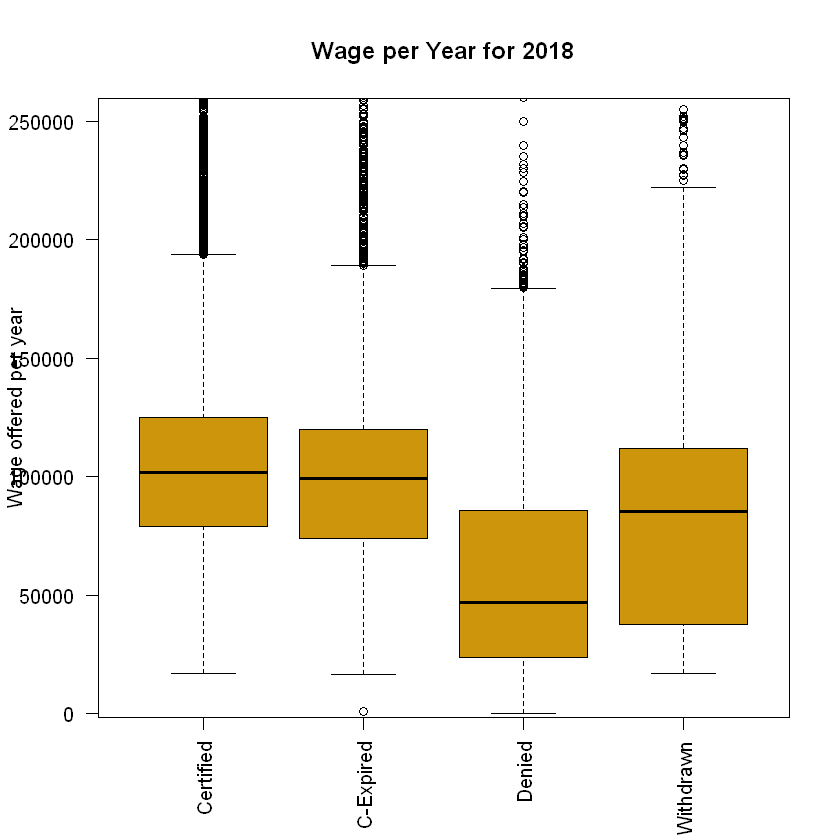

In [19]:
perm_2018$dummy[perm_2018$CASE_STATUS=="Certified"]<- "1"
perm_2018$dummy[perm_2018$CASE_STATUS=="Certified-Expired"]<- "2"
perm_2018$dummy[perm_2018$CASE_STATUS=="Denied"]<- "3"
perm_2018$dummy[perm_2018$CASE_STATUS=="Withdrawn"]<- "4"
perm_2018$dummy<- factor(perm_2018$dummy)

boxplot(perm_2018$all.year ~ perm_2018$dummy, las=2, ylim=c(8000, 250000),
       names = c("Certified","C-Expired","Denied","Withdrawn"),
       ylab="Wage offered per year", col="darkgoldenrod3", main="Wage per Year for 2018")

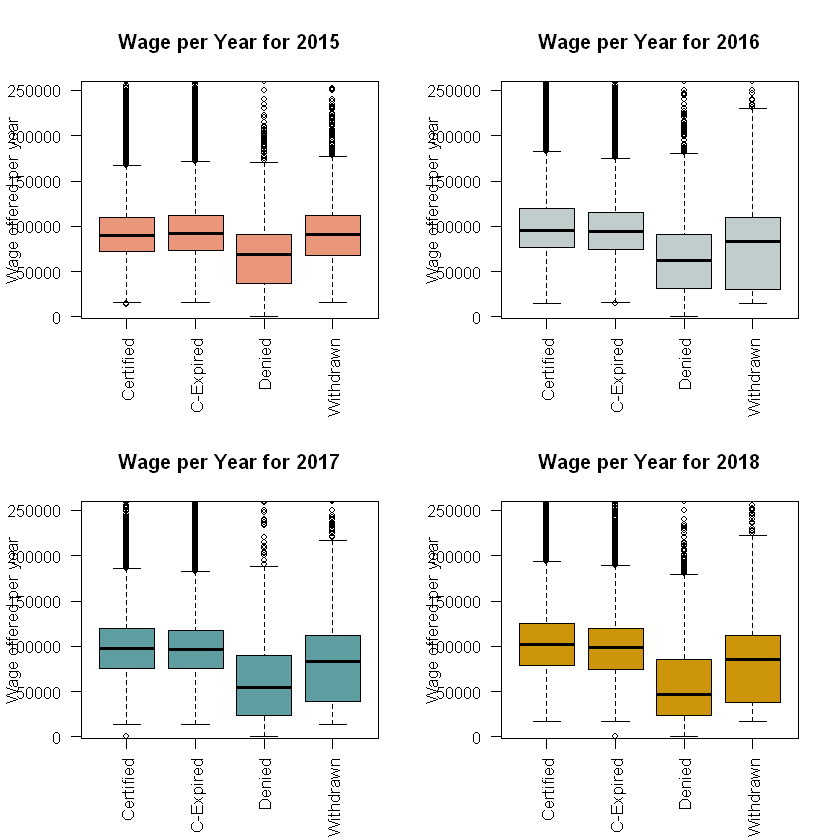

In [24]:
par(mfrow=c(2,2))
boxplot(perm_2015$all.year ~ perm_2015$dummy, las=2, ylim=c(8000, 250000),
       names = c("Certified","C-Expired","Denied","Withdrawn"),
       ylab="Wage offered per year", col="darksalmon", main="Wage per Year for 2015")
boxplot(perm_2016$all.year ~ perm_2016$dummy, las=2, ylim=c(8000, 250000),
       names = c("Certified","C-Expired","Denied","Withdrawn"),
       ylab="Wage offered per year", col="azure3", main="Wage per Year for 2016")
boxplot(perm_2017$all.year ~ perm_2017$dummy, las=2, ylim=c(8000, 250000),
       names = c("Certified","C-Expired","Denied","Withdrawn"),
       ylab="Wage offered per year", col="cadetblue", main="Wage per Year for 2017")
boxplot(perm_2018$all.year ~ perm_2018$dummy, las=2, ylim=c(8000, 250000),
       names = c("Certified","C-Expired","Denied","Withdrawn"),
       ylab="Wage offered per year", col="darkgoldenrod3", main="Wage per Year for 2018")